In [1]:
# Numpy library to use matrices
import numpy as np
import cv2

# Load display library for jupyter notebook
import matplotlib
from matplotlib import pyplot as plt


In [2]:
# We'll continue onwards with our canvas function
N = 100

def show_canvas(canvas, title=""):
    # Similar to doing cv2.imshow, but in this environment
    plt.figure(figsize = (8,8))
#     plt.axis('off')
    plt.imshow(canvas) 
    plt.title(title)
    
def reset_canvas(size):
    # Color image
    return np.ones((size,size,3), dtype=np.uint8) * 255


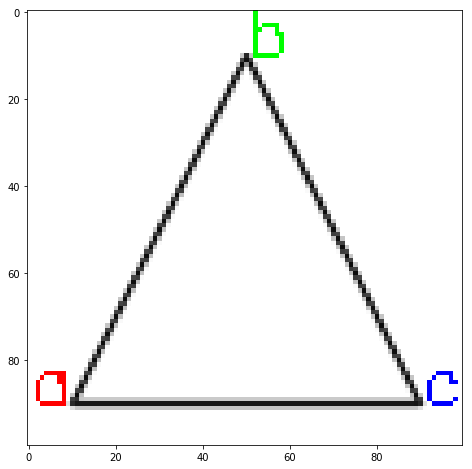

In [3]:
# Draw a triangle


def triangle(canvas, x0, x1, x2):
    X = np.array([[x0, x1, x2, x0]], np.int32)
    for i in range(len(X[0])):
        canvas = cv2.line(canvas, tuple(X[0][i-1]), tuple(X[0][i]), (0,0,0), 1, cv2.LINE_AA)

    font = cv2.FONT_HERSHEY_SIMPLEX
    canvas = cv2.putText(canvas, "a", tuple(x0 - np.array([10,0])), font, 0.5, (255, 0, 0))
    canvas = cv2.putText(canvas, "b", tuple(x1), font, 0.5, (0, 255, 0))
    canvas = cv2.putText(canvas, "c", tuple(x2), font, 0.5, (0, 0, 255))
    return canvas
                         
canvas = reset_canvas(N)                         
x0 = np.array([10, 90])
x1 = np.array([50, 10])
x2 = np.array([90, 90])                         
canvas = triangle(canvas, x0, x1, x2)
show_canvas(canvas)

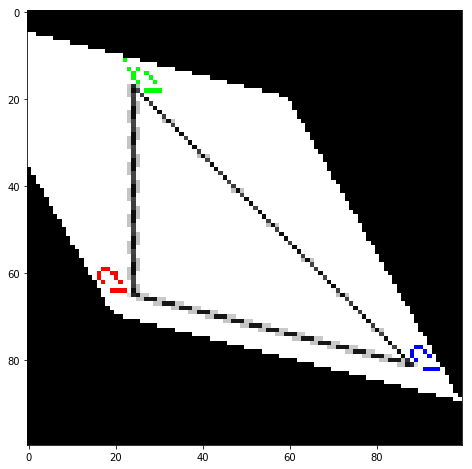

In [4]:
# Image warping---naive implementation

import itertools # Fancy for loop syntax

A = np.array(
    [[0.8, 0.4],
    [0.2, 0.7]]
)
b = np.array([
    [-20],
    [0]
])
A_inv = np.linalg.inv(A)
b_inv = -np.matmul(A_inv,b)

new_canvas = np.ones_like(canvas) * 0
# For each pixel
for y, x in itertools.product(range(N), range(N)):
    X = np.array([[x],[y]])
    Y = np.matmul(A_inv, X) + b_inv
    
    xx = int(round(Y[0,0]))
    yy = int(round(Y[1,0]))

    if yy >= 0 and yy < N and xx >= 0 and xx < N:
        new_canvas[y, x] = canvas[yy, xx]
    
show_canvas(new_canvas)

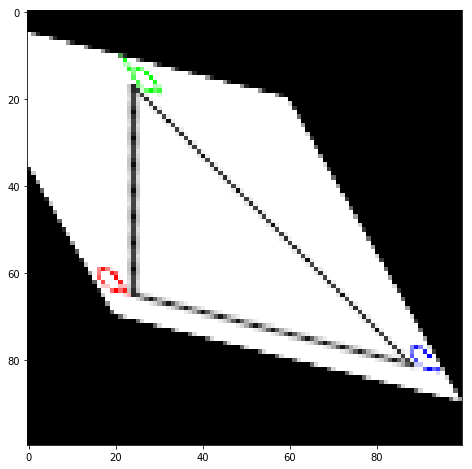

In [5]:
# An open CV way

A = np.array(
    [[0.8, 0.4],
    [0.2, 0.7]]
)
b = np.array([
    [-20],
    [0]
])

new_canvas = canvas.copy()
M = np.concatenate([A, b], axis=1)
new_canvas = cv2.warpAffine(
    new_canvas, M, new_canvas.shape[:2], 
    borderMode=cv2.BORDER_CONSTANT)
show_canvas(new_canvas)

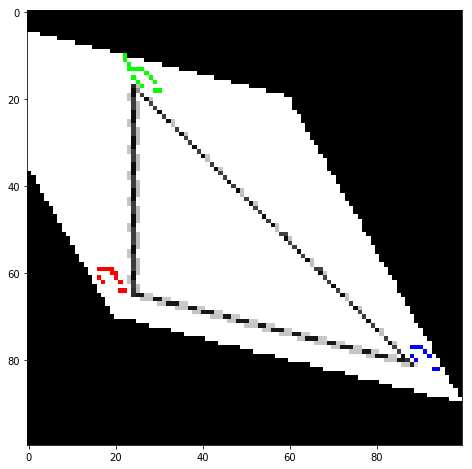

In [7]:
# What if we do the oposite? i.e. don't invert in and draw pixels the other way?

import itertools # Fancy for loop syntax

A = np.array(
    [[0.8, 0.4],
    [0.2, 0.7]]
)
b = np.array([
    [-20],
    [0]
])
# A_inv = np.linalg.inv(A)
# b_inv = -np.matmul(A_inv,b)

new_canvas = np.ones_like(canvas) * 0
# For each pixel
for y, x in itertools.product(range(N), range(N)):
    X = np.array([[x],[y]])
    Y = np.matmul(A, X) + b
    
    xx = int(round(Y[0,0]))
    yy = int(round(Y[1,0]))

    if yy >= 0 and yy < N and xx >= 0 and xx < N:
        new_canvas[yy, xx] = canvas[y, x]
    
show_canvas(new_canvas)

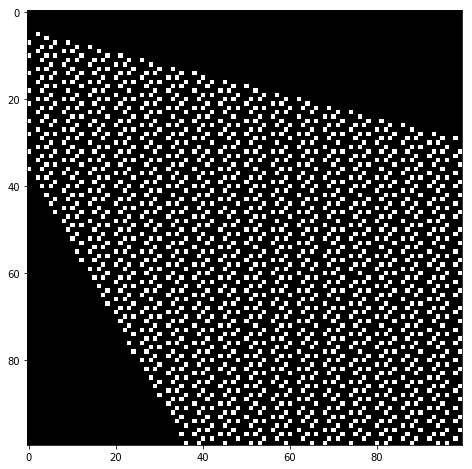

In [8]:
# Not too bad, but what if we had big scale change?

import itertools # Fancy for loop syntax

# Notice multiplcation with 3 here
A = 3 * np.array(
    [[0.8, 0.4],
    [0.2, 0.7]]
)
b = np.array([
    [-20],
    [0]
])
# A_inv = np.linalg.inv(A)
# b_inv = -np.matmul(A_inv,b)

new_canvas = np.ones_like(canvas) * 0
# For each pixel
for y, x in itertools.product(range(N), range(N)):
    X = np.array([[x],[y]])
    Y = np.matmul(A, X) + b
    
    xx = int(round(Y[0,0]))
    yy = int(round(Y[1,0]))

    if yy >= 0 and yy < N and xx >= 0 and xx < N:
        new_canvas[yy, xx] = canvas[y, x]
    
show_canvas(new_canvas)

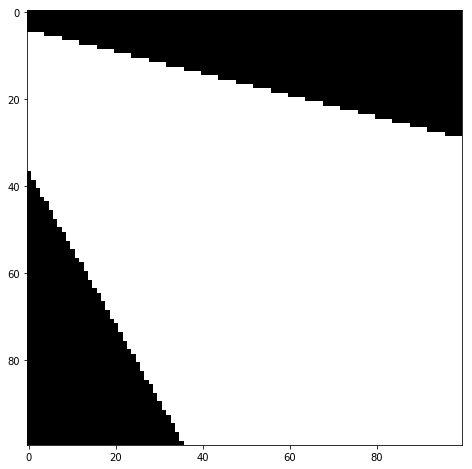

In [9]:
# What if we invert?

import itertools # Fancy for loop syntax

A = 3 * np.array(
    [[0.8, 0.4],
    [0.2, 0.7]]
)
b = np.array([
    [-20],
    [0]
])
A_inv = np.linalg.inv(A)
b_inv = -np.matmul(A_inv,b)

new_canvas = np.ones_like(canvas) * 0
# For each pixel
for y, x in itertools.product(range(N), range(N)):
    X = np.array([[x],[y]])
    Y = np.matmul(A_inv, X) + b_inv
    
    xx = int(round(Y[0,0]))
    yy = int(round(Y[1,0]))

    if yy >= 0 and yy < N and xx >= 0 and xx < N:
        new_canvas[y, x] = canvas[yy, xx]
    
show_canvas(new_canvas)